# Аналитика для сети фитнес-центров «Культурист-датасаентист»

### Анализ поведения клиентов, кластеризация и рекомендации по уменьшению оттока

Сеть фитнес-центров «Культурист-датасаентист» разрабатывает стратегию взаимодействия с клиентами на основе аналитических данных.
Распространённая проблема фитнес-клубов и других сервисов — отток клиентов. Как понять, что клиент больше не с вами? Можно записать в отток тех, кто попросил закрыть договор или удалил аккаунт. Однако клиенты не всегда уходят демонстративно: чаще перестают пользоваться сервисом тихо.
Индикаторы оттока зависят от специфики отрасли. Когда пользователь редко, но стабильно закупается в интернет-магазине — не похоже, что он «отвалился». А вот если две недели не заходит на канал с ежедневно обновляемым контентом, дела плохи: подписчик заскучал и, кажется, оставил вас.
Для фитнес-центра можно считать, что клиент попал в отток, если за последний месяц ни разу не посетил спортзал. Конечно, не исключено, что он уехал на Бали и по приезде обязательно продолжит ходить на фитнес. Однако чаще бывает наоборот. Если клиент начал новую жизнь с понедельника, немного походил в спортзал, а потом пропал — скорее всего, он не вернётся.
Чтобы бороться с оттоком, отдел по работе с клиентами «Культуриста-датасаентиста» перевёл в электронный вид множество клиентских анкет. Ваша задача — провести анализ и подготовить план действий по удержанию клиентов.
А именно:

    научиться прогнозировать вероятность оттока (на уровне следующего месяца) для каждого клиента;
    сформировать типичные портреты клиентов: выделить несколько наиболее ярких групп и охарактеризовать их основные свойства;
    проанализировать основные признаки, наиболее сильно влияющие на отток;
    сформулировать основные выводы и разработать рекомендации по повышению качества работы с клиентами:
        1) выделить целевые группы клиентов;
        2) предложить меры по снижению оттока;
        3) определить другие особенности взаимодействия с клиентами.

## ШАГ 1. Загрузка данных.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('gym_churn.csv')

## ШАГ 2. Исследовательский анализ данных.

In [4]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [8]:
sorted(df['Month_to_end_contract'].unique())

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0]

Необходимо привести колонку Month_to_end_contract к типу int – в колонке только целочисленные значения. У остальных колонок с типами всё нормально. Пропусков нет.

In [9]:
df['Month_to_end_contract'] = df['Month_to_end_contract'].astype(int)

Посмотрим как сильно различаются средние значения показателей у тех, кто оттёк и у тех, кто остался

In [10]:
df.groupby('Churn').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month
Churn,,,,,,,,,,,,,
0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Уходящие клиенты реже приходят по акции "приведи друга", их средняя длительность контракта гораздо ниже, они меньше вкладываются в дополнительные услуги, они в среднем младше, средняя продолжительность посещения зала у них даже меньше одного месяца и посещают зал они реже. Отличий много.

Вот всё, что написал выше, но наглядно

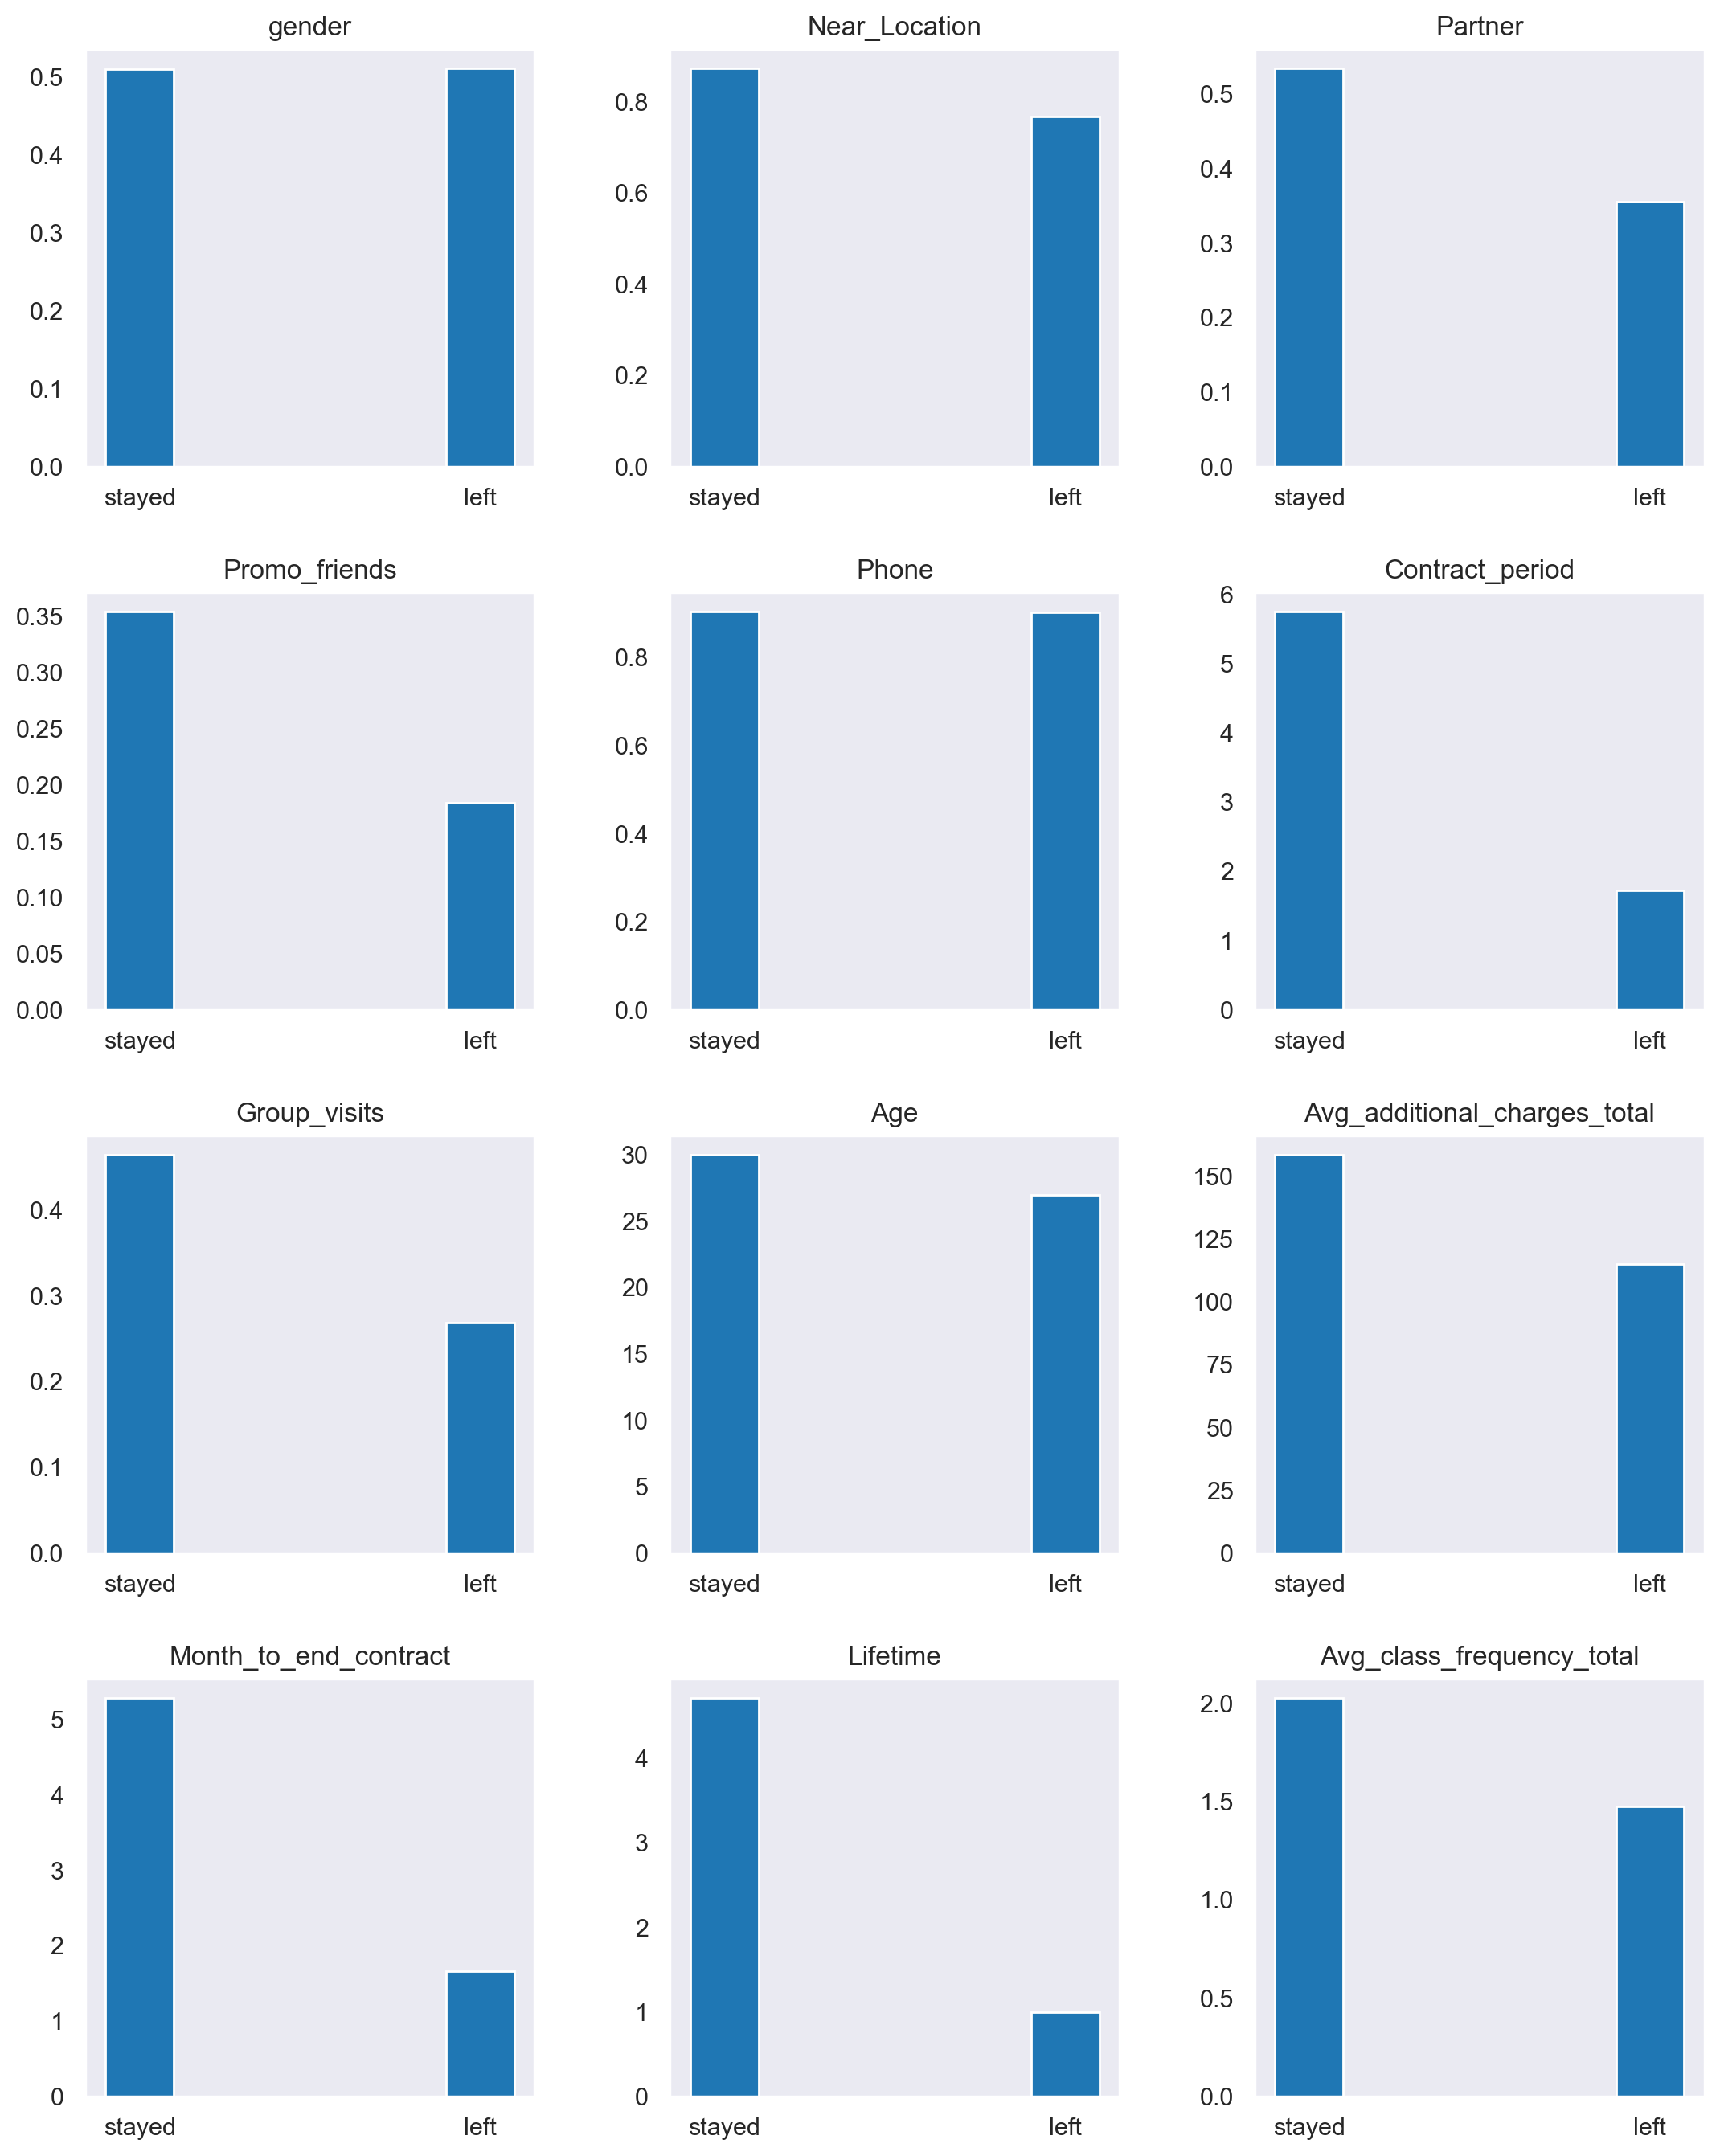

In [116]:
sns.set_style('dark')
columns=list(df.columns)
del columns[13]

fig, axs = plt.subplots(4, 3, figsize=(13,13),dpi=200)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)

for ax, column in zip(axs.ravel(),columns):
    ax.bar(df.groupby('Churn')[column].mean().index,
           df.groupby('Churn')[column].mean().values, width=0.2)
    ax.set_xticks([0,1])
    ax.set_xticklabels(['stayed','left'])
    ax.set_title(column)

Теперь посмотрим на матрицу корреляций

<AxesSubplot:>

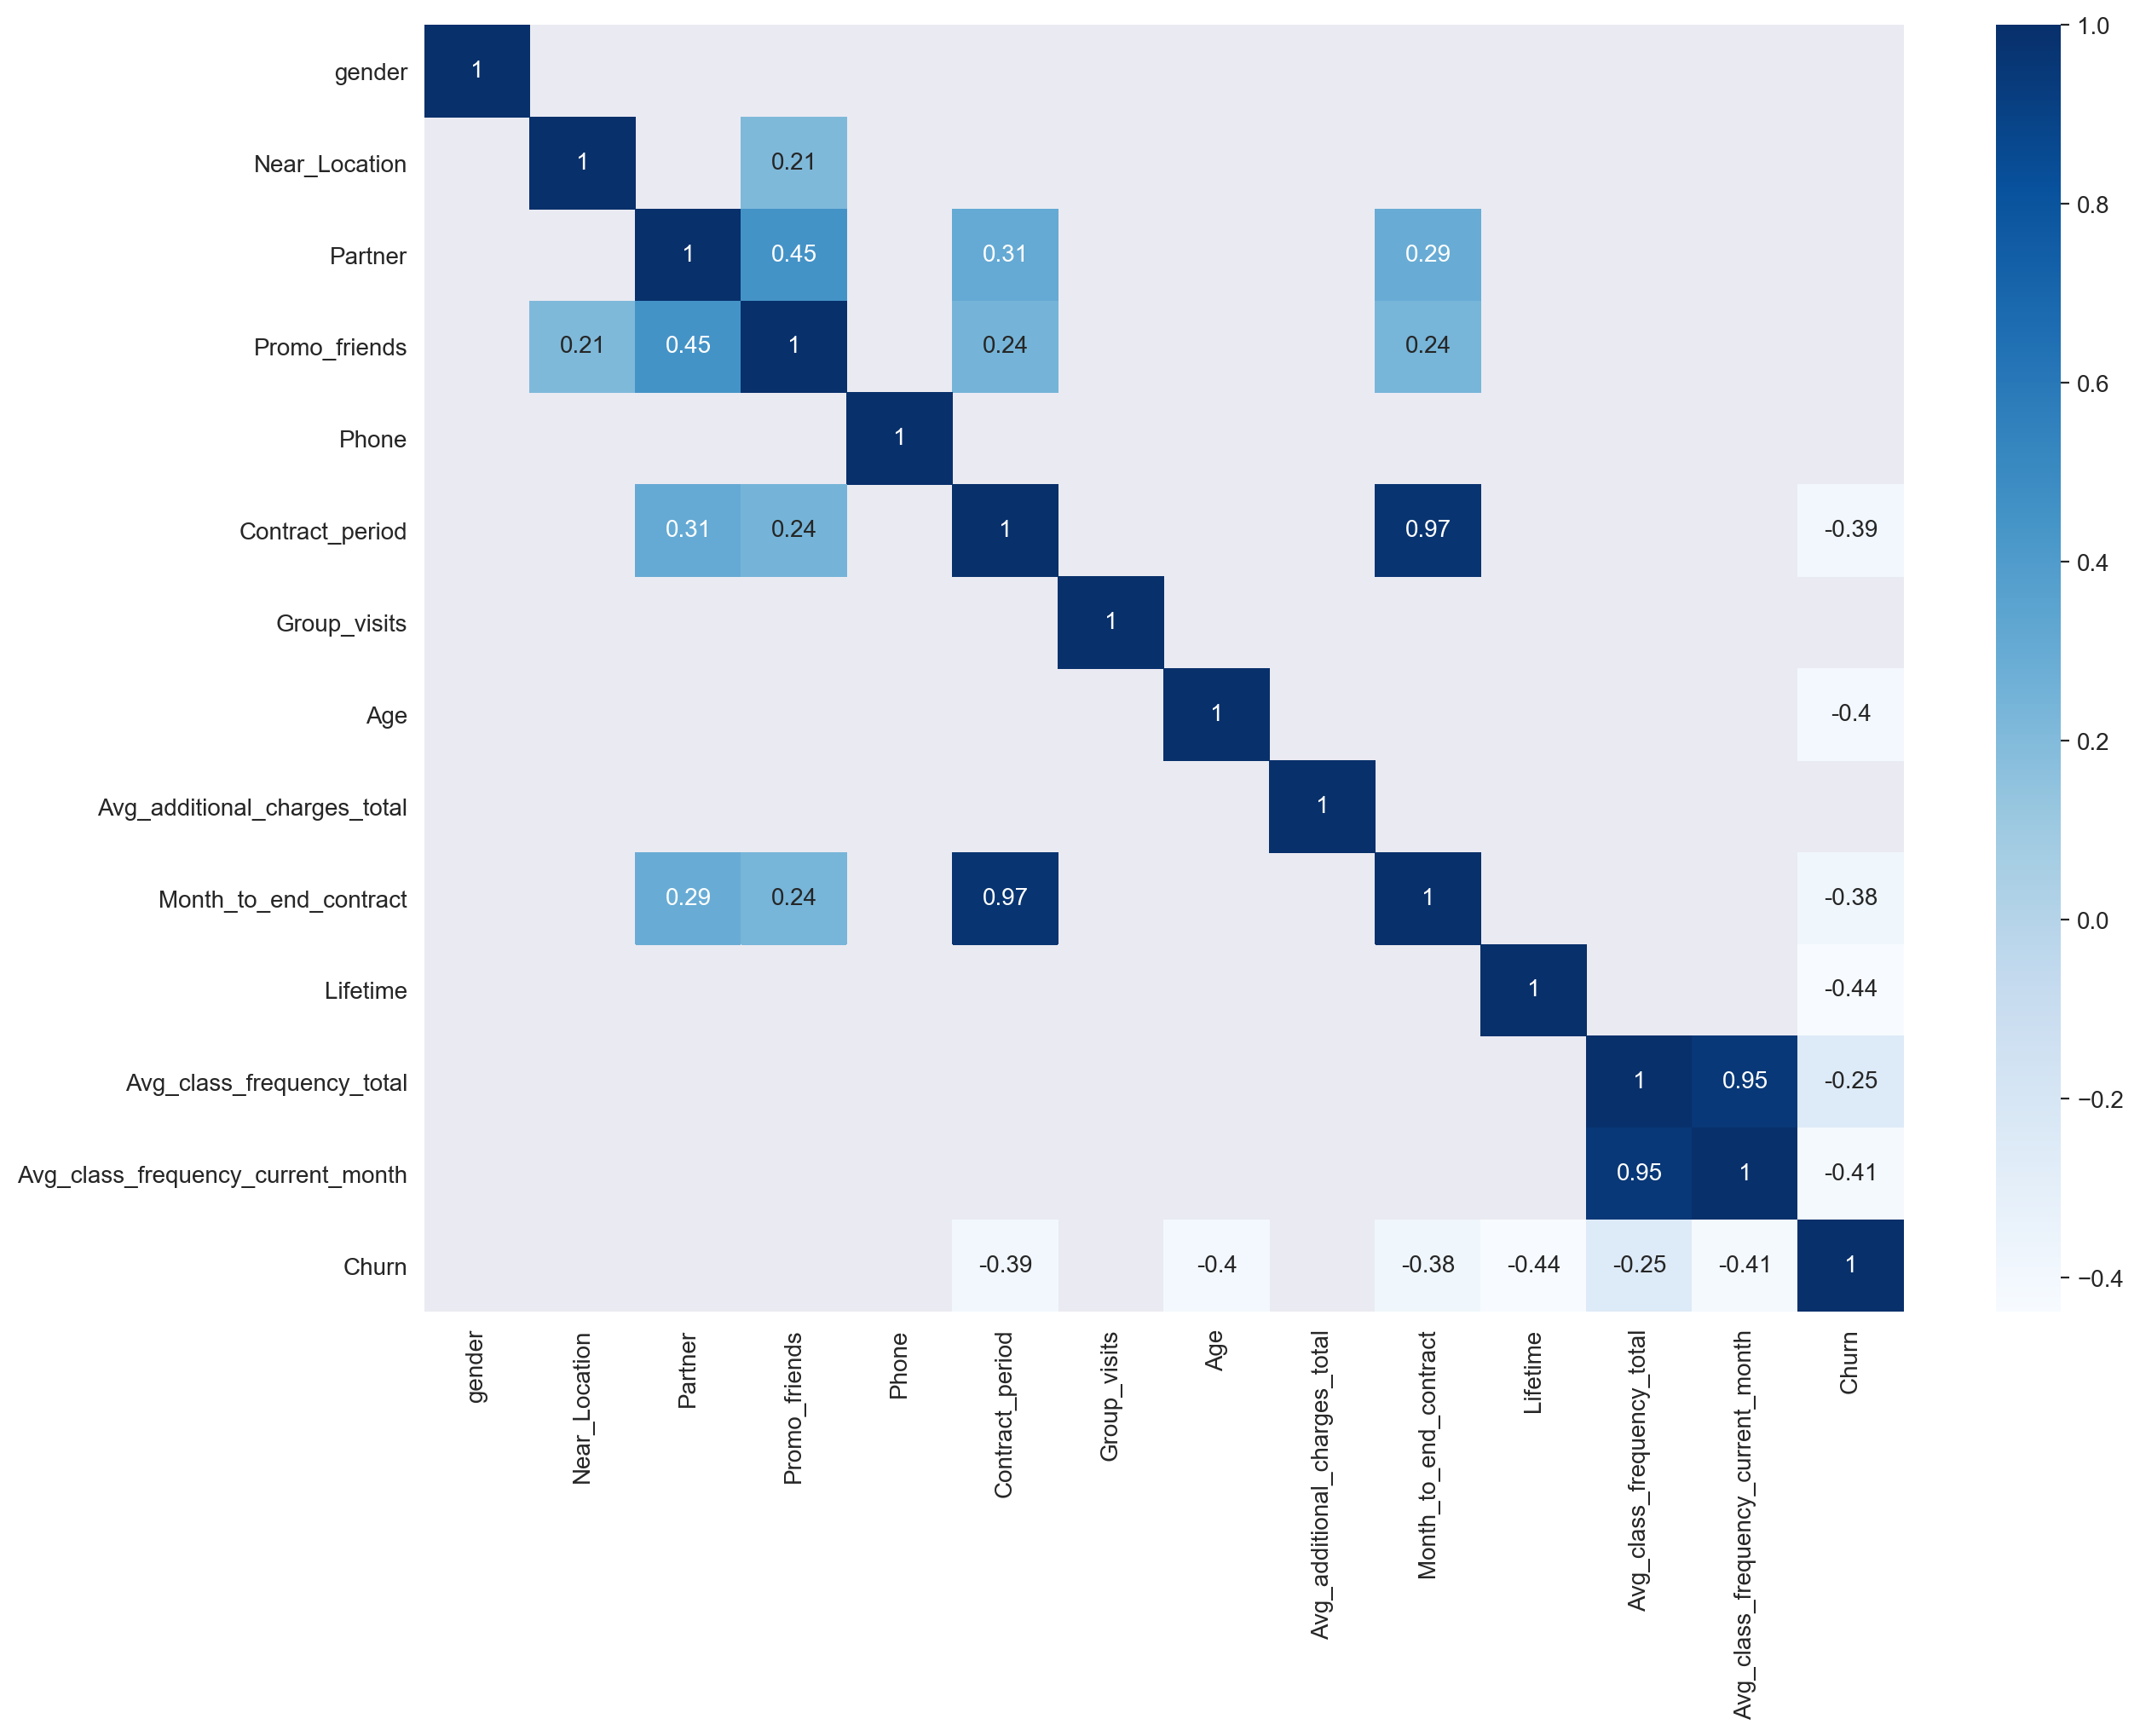

In [67]:
corr_matrix = df.corr()

plt.figure(figsize=(14,10),dpi=200)
sns.heatmap(corr_matrix[abs(corr_matrix)>0.2], 
            annot=True, 
            cmap='Blues', 
            fmt='.2g')

Сильно коррелируют показатели 
- `количество месяцев до окончания контракта` и `период контракта` 
- `частота посещений` и `частота посещений за последний месяц` 

С Churn коррелируют `Contract_period`, `Age`, `Lifetime`, `Month_to_end_contract` и `Avg_class_frequency_current_month`. Позже посмотрим, что на это скажет модель.

Text(0.5, 1.0, 'коррялция частоты посещений оставшихся')

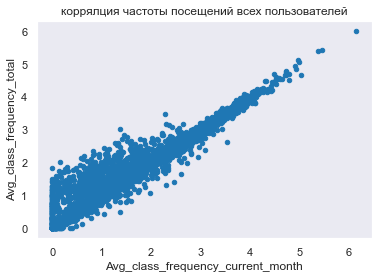

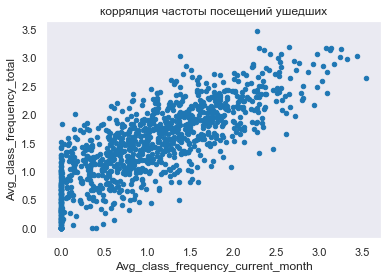

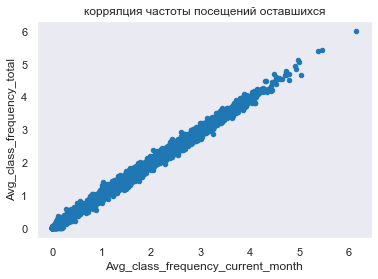

In [132]:
df.plot(kind='scatter',x='Avg_class_frequency_current_month',y='Avg_class_frequency_total')
plt.title('коррялция частоты посещений всех пользователей')

df[df['Churn'] == 1].plot(kind='scatter',x='Avg_class_frequency_current_month',y='Avg_class_frequency_total')
plt.title('коррялция частоты посещений ушедших')

df[df['Churn'] == 0].plot(kind='scatter',x='Avg_class_frequency_current_month',y='Avg_class_frequency_total')
plt.title('коррялция частоты посещений оставшихся')

`частота посещений` и `частота посещений за последний месяц` намного сильнее коррелируют у тех, кто продолжает ходить в зал. Если клиент вдруг начинает реже посещать зал, следует к нему присмотреться - вполне вероятно, что скоро он перестанет ходить вовсе.

Чтобы в модели не использовать сильно коррелирующие признаки, можно сразу создать столбик, в котором будет храниться разница между этими двумя показателями.

In [133]:
df['frequency_diff'] = df['Avg_class_frequency_total'] - df['Avg_class_frequency_current_month']

<AxesSubplot:>

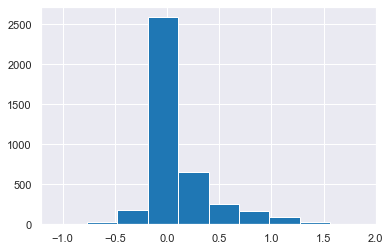

In [134]:
df['frequency_diff'].hist()

Те, у кого положительные значения, по идее, должны чаще оттекать. Проверим это дальше, а сейчас уберём `Avg_class_frequency_total` из таблицы.

In [135]:
df = df.drop('Avg_class_frequency_total', axis=1)

Дальше посмотрим, что происходит между Month_to_end_contract и Contract_period.

In [136]:
df.groupby(['Month_to_end_contract','Contract_period'])['Churn'].agg(['count','mean'])

count      mean
Month_to_end_contract Contract_period                 
1                     1                 2207  0.423199
2                     6                    9  0.222222
                      12                   5  0.000000
3                     6                   21  0.047619
                      12                   2  0.000000
4                     6                   49  0.142857
                      12                   9  0.000000
5                     6                  123  0.154472
                      12                   7  0.000000
6                     6                  631  0.118859
                      12                  14  0.071429
7                     12                  25  0.040000
8                     12                  38  0.026316
9                     12                  73  0.013699
10                    12                  82  0.024390
11                    12                 181  0.022099
12                    12                 524  0.024809

Контракты продают либо на месяц, либо на шесть, либо на год. Так вышло, что один месяц до окончания контракта только у тех, кто оформил его на один месяц

Для интереса посмотрим, сколько в одномесячных клиентах оттекающих

In [137]:
df[df['Contract_period']==1]['Churn'].sum()/df['Churn'].sum()

0.8803016022620169

88% оттока – это клиенты с одномесячными контрактами.

Теперь решим, какой из двух столбиков убрать

<AxesSubplot:xlabel='Contract_period'>

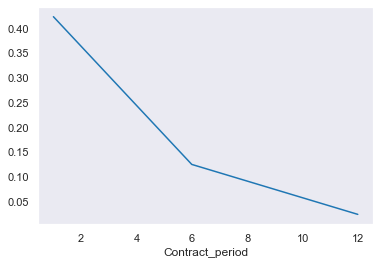

In [138]:
df.groupby(['Contract_period'])['Churn'].mean().plot()

<AxesSubplot:xlabel='Month_to_end_contract'>

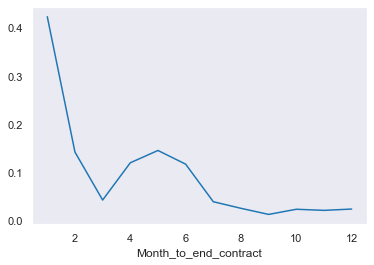

In [139]:
df.groupby(['Month_to_end_contract'])['Churn'].mean().plot()

С одной стороны, можно убрать колонку Month_to_end_contract – её динамика выглядит не такой предсказуемой, как у Contract_period, а с другой – признак Month_to_end_contract может принимать больше значений и, вероятно, более информативен.

Уберём Contract_period

In [140]:
df = df.drop('Contract_period', axis=1)

### Обработка выбросов

Колонок, в которых могут быть выбросы, не так много. Вот они: `Age`, `Avg_additional_charges_total`, `frequency_diff`. Датасет достаточно большой, поэтому можно автоматически отсечь всё, что меньше 5 перцентиля и больше 95-го.

In [141]:
initial_length = len(df)

In [142]:
def delete_outliers(column):
    perc = np.percentile(column, [5, 95])
    return df[np.logical_and(column >= perc[0], column <= perc[1])]

In [143]:
def fill_outliers(column):
    perc = np.percentile(column, [5, 95])
    return column.apply(lambda x: column.mean() if (x <= perc[0]) or (x > perc[1]) else x)

In [144]:
df['Age'] = fill_outliers(df['Age'])
df['Avg_class_frequency_current_month'] = fill_outliers(df['Avg_class_frequency_current_month'])
df['frequency_diff'] = fill_outliers(df['frequency_diff'])
df = delete_outliers(df['Avg_additional_charges_total'])

In [145]:
(initial_length - len(df)) / len(df)

0.1111111111111111

Мы потеряли 11% данных, но выбросов больше быть не должно

## ШАГ 3. Модель прогнозирования оттока клиентов.

### Классификация пользователей

In [146]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [147]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [148]:
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train)
y_pred = model_log_reg.predict(X_test)
print('LogisticRegression')
print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred)))
print()

model_forest = RandomForestClassifier()
model_forest.fit(X_train, y_train)
y_pred = model_forest.predict(X_test)
print('RandomForestClassifier')
print('Accuracy:{:.2f} Precision:{:.2f} Recall:{:.2f} '.format(
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred)))

/Users/leonidharlov/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression
Accuracy:0.93 Precision:0.89 Recall:0.86 

RandomForestClassifier
Accuracy:0.94 Precision:0.93 Recall:0.86 


Иногда RandomForestClassifier показывает себя лучше во всех метриках, а иногда – LogisticRegression. В любом случае, оба алгоритма работают хорошо – разница не велика и можно использовать любой.

<ipython-input-149-33b5a37d0e00>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(X_train.columns,rotation=45,horizontalalignment='right',fontsize='small')
<ipython-input-149-33b5a37d0e00>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(X_train.columns,rotation=45,horizontalalignment='right',fontsize='small')


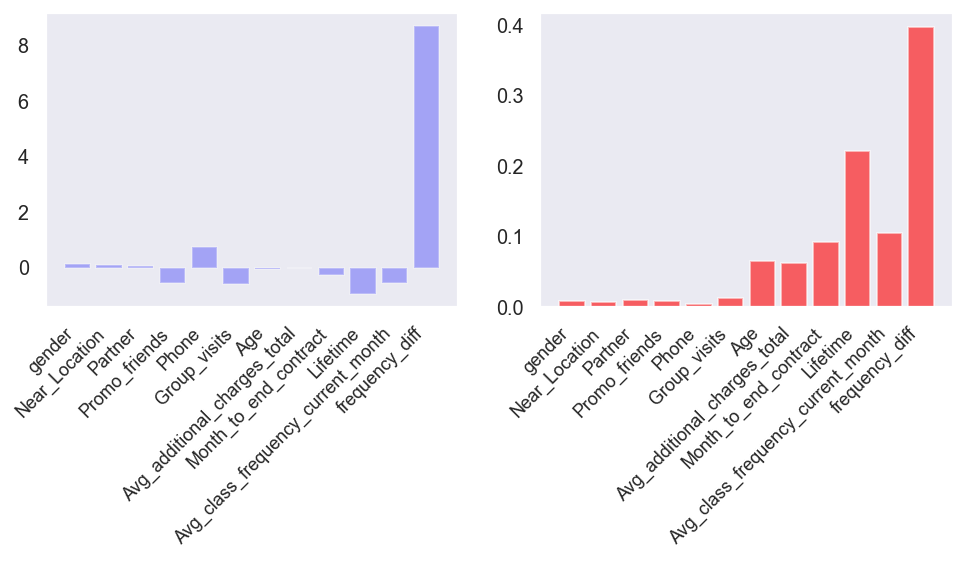

In [149]:
fig, (ax0,ax1) = plt.subplots(1, 2, figsize=(9,3),dpi=130)

ax0.bar(X_train.columns,model_log_reg.coef_.ravel().tolist(),color='blue',alpha=0.3)
ax0.set_xticklabels(X_train.columns,rotation=45,horizontalalignment='right',fontsize='small')

ax1.bar(X_train.columns,model_forest.feature_importances_.ravel().tolist(),color='red',alpha=0.6)
ax1.set_xticklabels(X_train.columns,rotation=45,horizontalalignment='right',fontsize='small')

plt.show()

В обеих моделях frequency_diff – самый важный признак, но случайный лес придал значительно больший вес показателю Lifetime.

## ШАГ 4. Кластеризация клиентов.

### Стандартизация

In [150]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering,KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [151]:
scaler = StandardScaler()
X_train_st = scaler.fit_transform(X_train)

X_test_st = scaler.transform(X_test)

<AxesSubplot:>

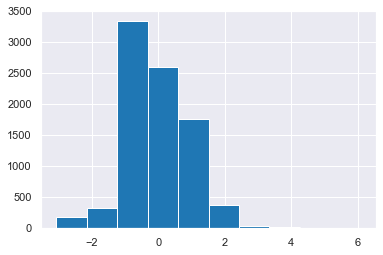

In [152]:
pd.Series(X_test_st.ravel()).hist()

Теперь распределение выглядит близким к нормальному, можно работать дальше

### Кластеризация

In [153]:
linked = linkage(X_test_st, method = 'ward')

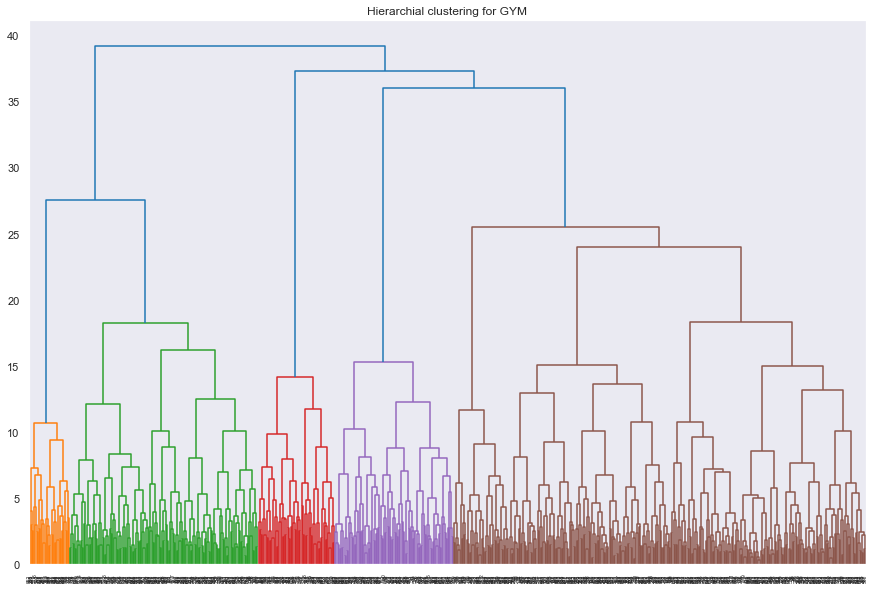

In [154]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show()

Алгоритм предлагает пять кластеров (плохо вижу цвета, могу ошибаться)

### Анализ кластеров

In [156]:
km = KMeans(n_clusters = 5, random_state=0)
sc = StandardScaler()
x_sc = sc.fit_transform(df.drop('Churn',axis=1))

labels = km.fit_predict(x_sc)
df['cluster'] = labels

df.groupby('cluster').mean()

,gender,Near_Location,Partner,Promo_friends,Phone,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_current_month,Churn,frequency_diff
cluster,,,,,,,,,,,,,
0,0.533724,0.865103,0.469208,0.304985,0.000000,0.431085,29.333004,144.853024,4.416422,3.730205,1.717557,0.272727,0.089302
1,0.496868,0.000000,0.503132,0.081420,1.000000,0.240084,29.262614,135.621791,2.947808,3.121086,1.681997,0.386221,0.097122
2,0.533835,0.958647,0.315789,0.199248,0.994361,0.221805,27.790865,114.803359,1.539474,1.125940,1.010864,0.909774,0.384477
3,0.524712,1.000000,0.158155,0.053542,1.000000,0.456343,29.736565,148.485346,3.305601,4.350082,1.959920,0.135914,0.015121
4,0.481625,0.996132,0.946809,0.761122,1.000000,0.516441,29.624228,151.268517,7.426499,4.530948,1.889412,0.059961,0.011935


In [157]:
print('Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)))

Silhouette_score: 0.14


По таблице сразу видно, что кластеры отличаются по признакам `Partner`, `Promo_friends`, `Month_to_end_contract`, `Group_visits`, `avg_class_frequecny_month` и `frequency_diff`. Посмотрим на графики.

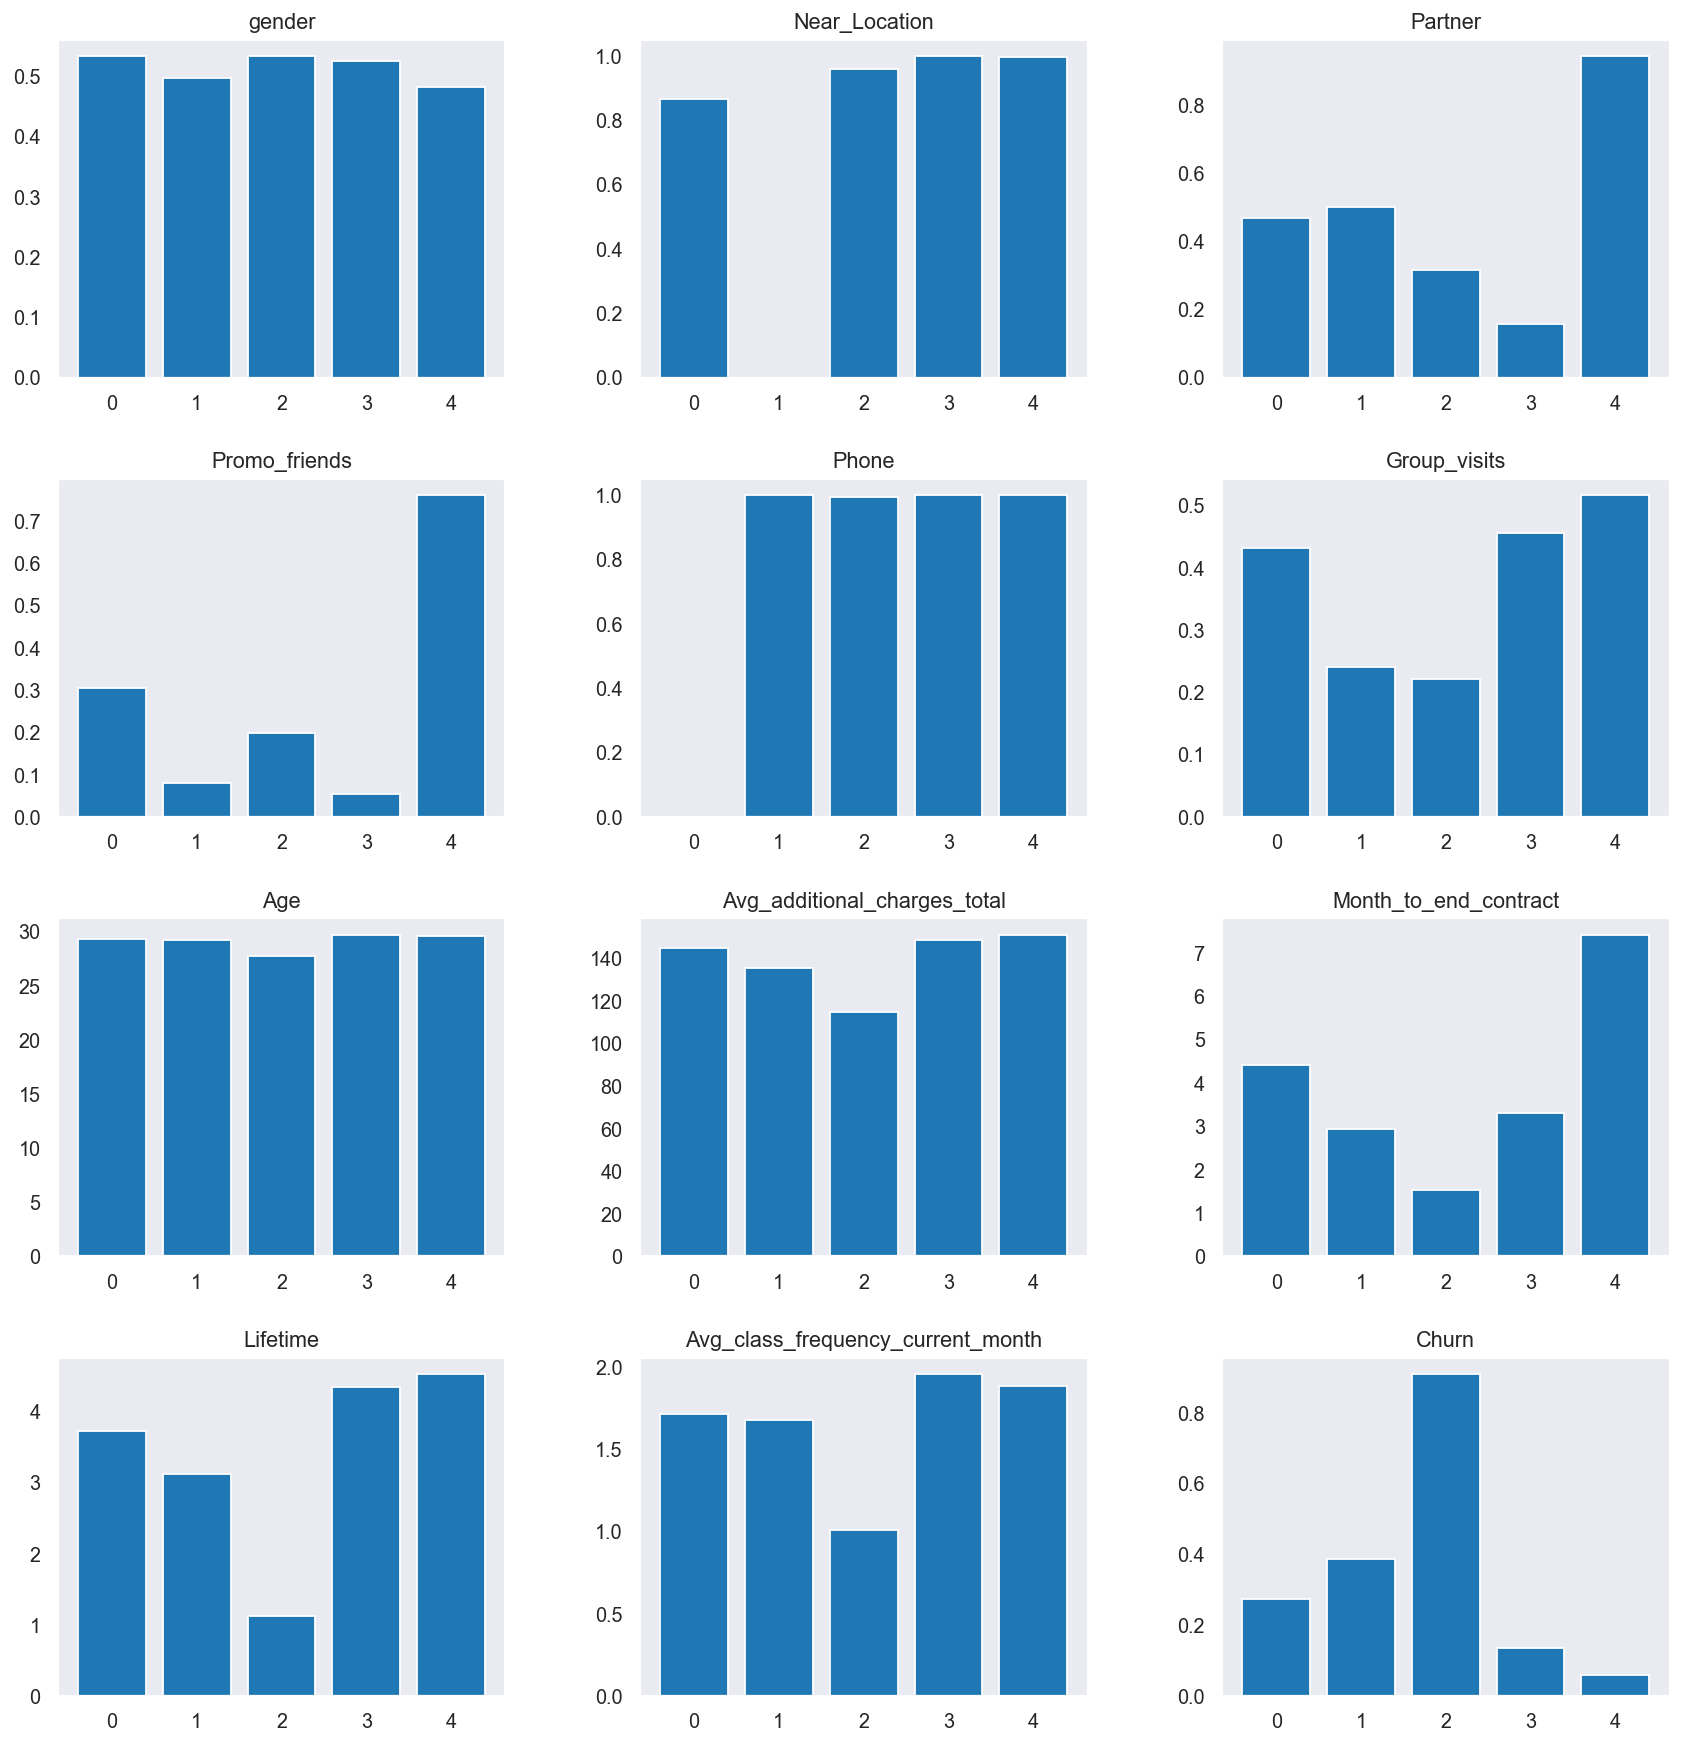

In [161]:
columns=list(df.columns)
del columns[12]

fig, axs = plt.subplots(4, 3, figsize=(16,13),dpi=130)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.3, wspace=0.3)

for ax, column in zip(axs.ravel(),columns):
    ax.bar(df.groupby('cluster')[column].mean().index,df.groupby('cluster')[column].mean().values)
    ax.set_title(column)

В то время как показатели `Avg_additional_charges_total`, `Age` и `Phone` (кроме одной группы) примерно одинаковы для клиентов всех кластеров, остальные показатели раличаются значительно. Дальше посмотрим на отток.

In [162]:
minimum = 1.01
maximum = -1.01

for i in range(5):
    print('Отток кластера {} – {:.0%}'.format(i, df[df['cluster']==i]['Churn'].mean()))

Отток кластера 0 – 27%
Отток кластера 1 – 39%
Отток кластера 2 – 91%
Отток кластера 3 – 14%
Отток кластера 4 – 6%


Самый надёжный кластер – кластер 4, а самый ненадёжный – кластер 2.

Пользователи самого надёжного кластера гораздо чаще других являются партнёрами фитнес-центра и приходят по акции "приведи друга", а также чаще занимаются в группах.

Посмотрим на диаграммы рассеяния

/Users/leonidharlov/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


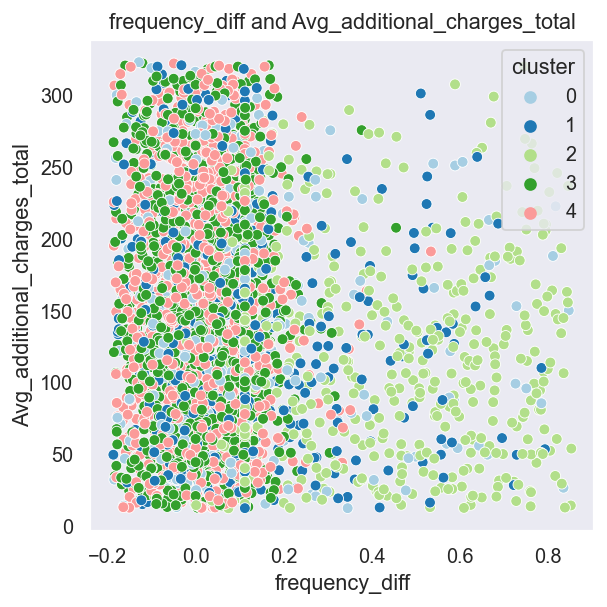

/Users/leonidharlov/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


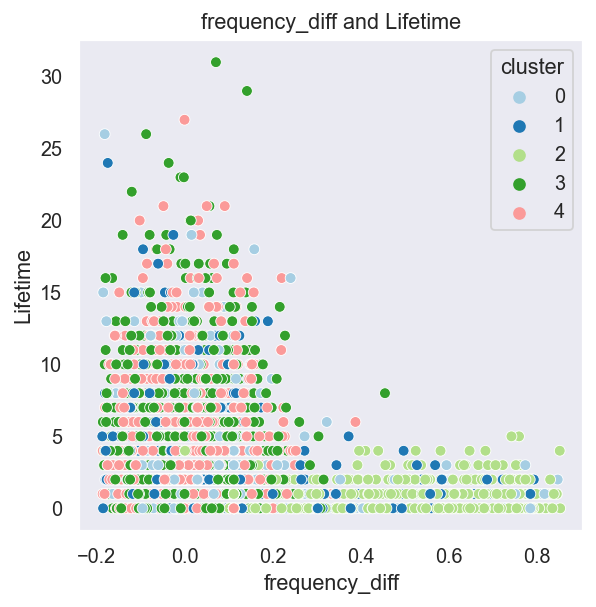

In [163]:
def show_clusters_on_plot(df, x_name,y_name, cluster_name):
    plt.figure(figsize = (5,5),dpi=130)
    sns.scatterplot(df[x_name], df[y_name],
           hue = df[cluster_name], palette = 'Paired'
       )
    plt.title('{} and {}'.format(x_name, y_name))
    plt.show()

show_clusters_on_plot(df, 'frequency_diff', 'Avg_additional_charges_total', 'cluster')
show_clusters_on_plot(df, 'frequency_diff', 'Lifetime', 'cluster')

Видно, что кластер 4 сильно отличается от остальных – клиенты в нём имеют в среднем самые низкие показатели `lifetime` и самые высокие показатели `frequency_diff`, а кластеры 0 и 3 менее плотные, чем кластеры 2 и 1. У кластера 1 большое `lifetime`, высокие `avg_additional_charges` и низкая `frequency_diff`.

### Портреты типичных пользователей кластеров

<b>Кластер 0:</b>
<li>Середнячки по оттоку (27%)</li>
<li>Не оставляют свой номер телефона</li>
<li>Часто посещают групповые занятия</li>

<b>Кластер 1:</b>
<li>Второе место по утёкшим пользователям (39%)</li>
<li>Далеко живут</li>
<li>Редко ходят на групповые занятия</li>
<li>Очень редко приходят по акции "Приведи друга"</li>

<b>Кластер 2:</b>
<li>Чемпионы по оттоку (91%)</li>
<li>Оформляют контракт на 1 месяц</li>
<li>Реже всех ходят на занятия обычные и групповые</li>
<li>Меньше всех тратятся на доп. услуги</li>

<b>Кластер 3:</b>
<li>Почти что самые надёжные (14%)</li>
<li>Похожи на клиентов кластера 4, только похуже</li>
<li>Часто ходят в зал на обычные и групповые занятия</li>
<li>Длинный срок контракта</li>
<li>Реже всех приходят по акциям</li>

<b>Кластер 4:</b>
<li>Самый надёжный кластер – уходят только 6%</li>
<li>Самый длинный средний срок контракта</li>
<li>Чаще всех приходят по акциям</li>
<li>Чаще всех посещают групповые занятия</li>

## ШАГ 5

### Вывод

Клиентов фитнес-центров «Культурист-датасаентист» можно условно разделить на пять кластеров, каждый из которых отличается по среднему проценту оттока. Самый надёжный кластер имеет отток 6%, а самый ненадёжный – 91%.

Самый весомый критерий для определения, перестанет ли ходить клиент в ближайшее время – изменение поведения <i>(разность среднего количество походов в зал за всё время и среднего количества походов за последний месяц)</i>

### Рекомендации

<b>Чем меньше время с момента первого обращения в фитнес-центр, тем больше вероятность оттока клиента</b> – необходимо удержать клиента больше одного месяца и тогда вероятность того, что он уйдёт, резко снизится.

<b>Пользователи самого надёжного кластера гораздо чаще других являются партнёрами фитнес-центра и приходят по акции "приведи друга"</b> – вероятно, для снижения оттока могут помочь новые акции и скидки

<b>Клиенты трёх наиболее надёжных кластеров часто (по сравнению с остальными) посещают групповые занятия</b> – можно попробовать активнее привлекать клиентов участвовать в групповых занятиях – вероятно, чувство общности будет их удерживать

Если клиент вдруг <b>начинает реже посещать зал</b>, следует к нему присмотреться – вполне вероятно, что скоро он перестанет ходить вовсе.